In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


jetblue_df = pd.read_csv("JFK_B9_Sep2017.csv", skiprows = 7, usecols = list(range(17)))
united_df = pd.read_csv("EWR_UA_Sep2017.csv", skiprows = 6)

jb_delaybydest = jetblue_df[['Destination Airport', 'Departure delay (Minutes)']]
ua_delaybydest = united_df[['Destination Airport', 'Departure delay (Minutes)']]
jb_delaybytime = jetblue_df[['Scheduled departure time', 'Departure delay (Minutes)']]
ua_delaybytime = united_df[['Scheduled departure time', 'Departure delay (Minutes)']]


In [2]:
jb_avgdelay = jb_delaybydest.groupby('Destination Airport', as_index = False)[['Departure delay (Minutes)']].mean()
ua_avgdelay = ua_delaybydest.groupby('Destination Airport', as_index = False)[['Departure delay (Minutes)']].mean()

jb_avgdelay.rename(columns={'Destination Airport' : 'Dest'}, inplace = True)
ua_avgdelay.rename(columns={'Destination Airport' : 'Dest'}, inplace = True)

jb_avgdelay.rename(columns={'Departure delay (Minutes)' : 'Mean delay'}, inplace = True)
ua_avgdelay.rename(columns={'Departure delay (Minutes)' : 'Mean delay'}, inplace = True)

jb_avgdelay.sort_values('Mean delay', inplace = True)
ua_avgdelay.sort_values('Mean delay', inplace = True)

jbairports = jb_avgdelay['Dest'].tolist()
jbdelays = jb_avgdelay['Mean delay'].tolist()

In [7]:
jb_avgdelay.sort_values('Mean delay', inplace = True, ascending = False)
ua_avgdelay.sort_values('Mean delay', inplace = True, ascending = False)

[Text(0,0.5,'Destination'),
 (0, 150),
 Text(0.5,0,'Minutes of delay'),
 Text(0.5,1,'Jetblue Top 10 Delays from JFK')]

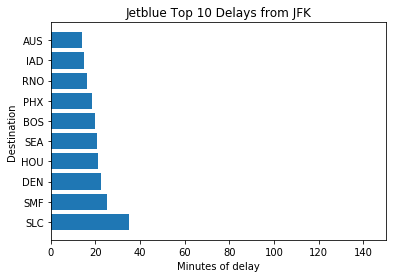

In [8]:
fig, ax = plt.subplots()
ax.barh(jb_avgdelay.head(10)['Dest'].tolist(), jb_avgdelay.head(10)['Mean delay'].tolist())
ax.set(xlim=[0, 150], xlabel='Minutes of delay', ylabel='Destination',
       title='Jetblue Top 10 Delays from JFK')

[Text(0,0.5,'Destination'),
 (0, 150),
 Text(0.5,0,'Minutes of delay'),
 Text(0.5,1,'United Top 10 Delays from EWR')]

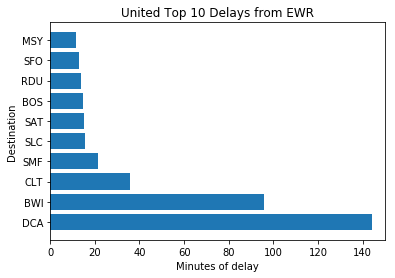

In [9]:
fig2, ax2 = plt.subplots()
ax2.barh(ua_avgdelay.head(10)['Dest'].tolist(), ua_avgdelay.head(10)['Mean delay'].tolist())
ax2.set(xlim=[0, 150], xlabel='Minutes of delay', ylabel='Destination',
       title='United Top 10 Delays from EWR')